In [84]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
import numpy as np
import torch
from dynamic_quant_ops import tensor_quant_gelu, tensor_quant_scale
import matplotlib.pyplot as plt

In [86]:
inputs = torch.Tensor([-3, -1, 1, 3, 5])
gelu_gt = torch.nn.functional.gelu(inputs)
gelu_test = tensor_quant_gelu(inputs)

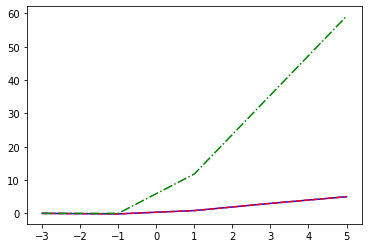

In [112]:
plt.plot(inputs, gelu_gt, 'b')
plt.plot(inputs, gelu_test, 'r--')
plt.plot(inputs, intgelu_test[0], 'g-.')
plt.show()

In [88]:
from transformers.models.ibert.quant_modules import IntGELU

In [89]:
intgelu = IntGELU()

In [109]:
inputs_int, inputs_scale = tensor_quant_scale(inputs, bits=32, scale=.1)
intgelu_test = intgelu(inputs, torch.Tensor([inputs_scale]))

In [110]:
(intgelu_test[0] / intgelu_test[1])

tensor([ -0.,  -0., -10., -30., -50.])

In [111]:
print(inputs_scale)

0.1


In [103]:
print(intgelu_test[1])

tensor([-0.0713])
